In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn import datasets 


In [3]:
#get titanic & test csv files as a DataFrame
df_train = pd.read_csv("/Users/home/Desktop/Univ/CSTU/PYTHON_NOTEBOOKS/titanic_train.csv")
print(df_train.shape)
df_train.keys()

(891, 12)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Check for missing values

In [5]:
#Checking for missing data
NAs = pd.concat([df_train.isnull().sum()], axis=1)
NAs[NAs.sum(axis=1) > 0]

,0
Age,177
Cabin,687
Embarked,2


In [6]:
print(NAs)

               0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age          177
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       2


For our initial analysis we will remove few of the features, like cabin, ticket, and Name 

In [7]:
#df_train.pop('Cabin')
#df_train.pop('Name')
#df_train.pop('Ticket')

df_train1=df_train.drop(['Cabin', 'Name', 'Ticket'], axis=1)

In [8]:
df_train1.shape

(891, 9)

Filling the missing values

In [9]:
# Filling missing Age values with mean
df_train1['Age'] = df_train1['Age'].fillna(df_train1['Age'].mean())

In [10]:
# Filling missing Embarked values with most common value
df_train1['Embarked'] = df_train1['Embarked'].fillna(df_train1['Embarked'].mode()[0])

‘Pclass’ is a categorical feature so we convert its values to strings

In [11]:
df_train1['Pclass'] = df_train1['Pclass'].apply(str)
df_train1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

Let’s perform a basic one hot encoding of categorical features

In [12]:
# Getting Dummies from all other categorical vars
for col in df_train1.dtypes[df_train1.dtypes == 'object'].index:
    for_dummy = df_train1.pop(col)
df_train1 = pd.concat([df_train1, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [13]:
# Prepare data for training models
target = df_train1.pop('Survived')

In [14]:
df_train1.head()

,PassengerId,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,22.0,1,0,7.2500,0,0,1
1,2,38.0,1,0,71.2833,1,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,4,35.0,1,0,53.1000,0,0,1
4,5,35.0,0,0,8.0500,0,0,1


In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train1, target, test_size=0.2, random_state = 123)

In [16]:
## Running with default parameters

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [17]:
y_pred = dt_model.predict(x_test)

In [18]:
print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))  

print(accuracy_score(y_test, y_pred))  


[[71 43]
 [29 36]]
0.5977653631284916


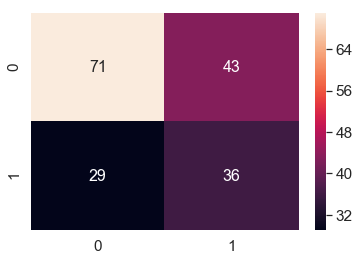

In [19]:
# plot confusion matrix

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2),range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})

In [20]:
# Another measure is AUC (Area under curve) as teh evaluation metric

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5883265856950067

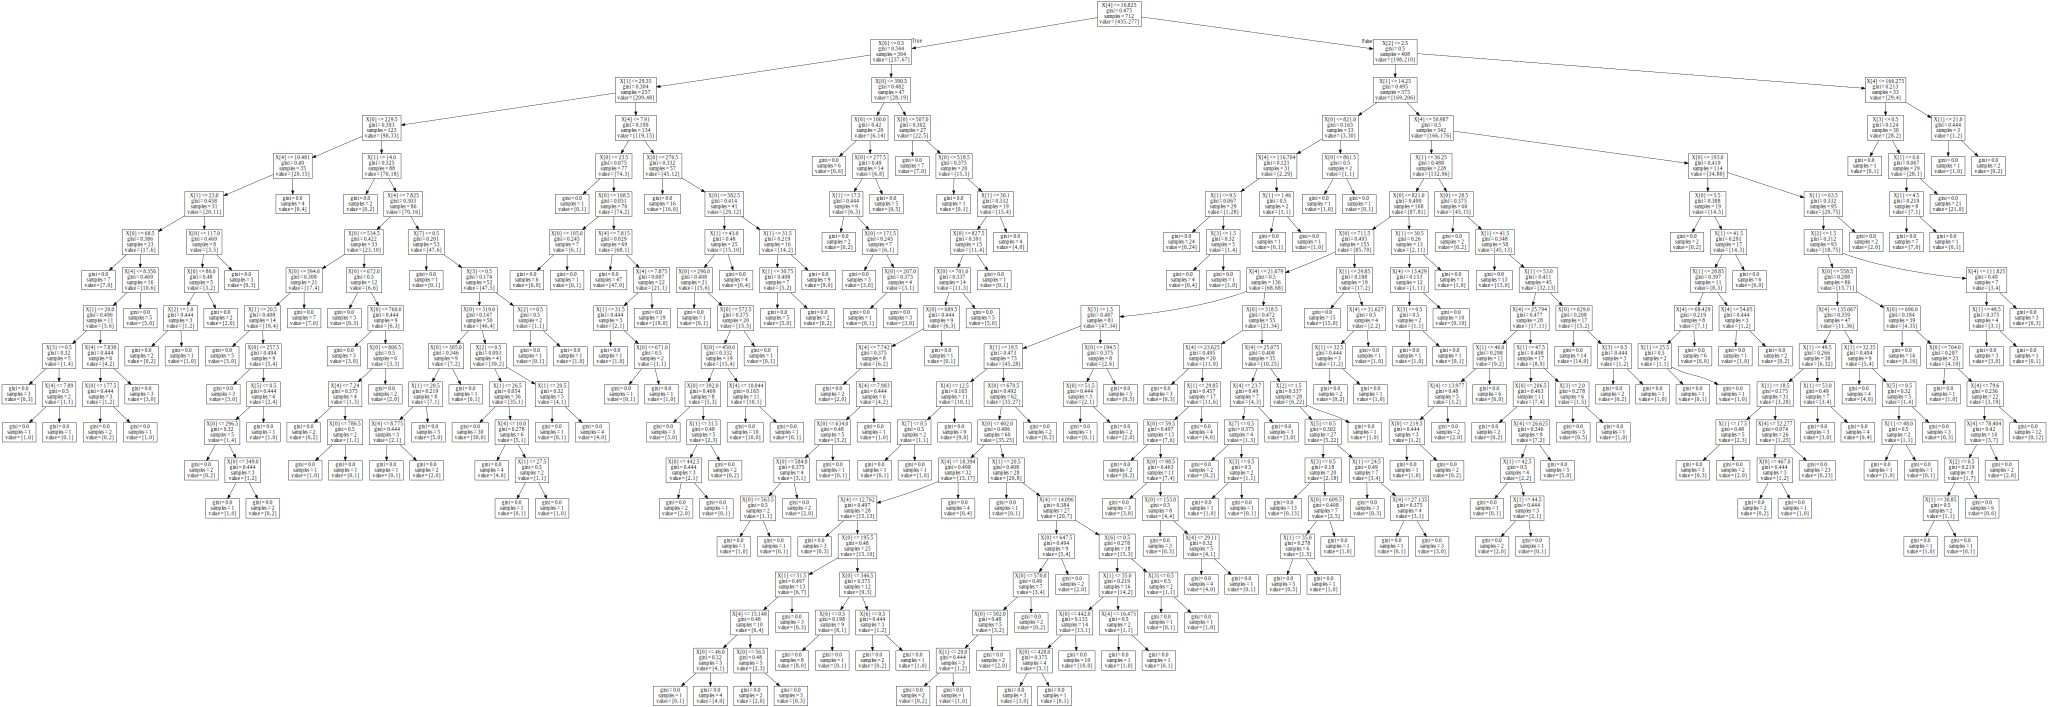

In [21]:
# Plotting the tree
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dt_model, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris")
graph

In [22]:
#x_train.columns
x_train.head()

,PassengerId,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
329,330,16.0,0,1,57.9792,1,0,0
749,750,31.0,0,0,7.7500,0,1,0
203,204,45.5,0,0,7.2250,1,0,0
421,422,21.0,0,0,7.7333,0,1,0
97,98,23.0,0,1,63.3583,1,0,0


In [23]:
from sklearn.model_selection import GridSearchCV

import time
seconds = time.time()

criteria=('gini', 'entropy')
max_depths = np.linspace(1, 32, 32, endpoint=True)
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
max_features = list(range(1,x_train.shape[1]))

parameters = {'criterion':criteria,'max_depth':max_depths, 'min_samples_split': min_samples_splits, 'min_samples_leaf':min_samples_leafs,'max_features':max_features}
              
dt = DecisionTreeClassifier()
Start = time.time()
model = GridSearchCV(dt, parameters, cv=10)
model.fit(x_train, y_train)
print(model.best_params_)

time_taken = time.time()-Start

KeyboardInterrupt: 

In [ ]:
# Make the model with the above paramteresr and see teh performance. 

In [33]:
time_taken

320.891250371933

In [34]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 3.0,
 'max_features': 5,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.2}